In [2]:
pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import sys
print(sys.version)

3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]


In [4]:
pip install nsepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [59]:
# Importing dependencies
from nsepy import get_history as gh
import numpy as np
np.random.seed(1)
import tensorflow as tf
tf.random.set_seed(2)
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.layers.core import Dense
from keras.layers.recurrent import LSTM
from keras import optimizers
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import datetime as dt
import time
plt.style.use('ggplot')

import snscrape.modules.twitter as sntwitter
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt

In [6]:
# Creating list to append tweet data to
attributes_container = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('Steel and India since:2016-01-01 until:2022-06-30').get_items()):
    if i>100000:
        break
    attributes_container.append([tweet.date, tweet.content])
    
# Creating a dataframe to load the list
tweets_df = pd.DataFrame(attributes_container, columns=["Date Created", "Tweet"])

In [7]:

tweets_df

,Date Created,Tweet
0,2022-06-29 21:30:47+00:00,New Energy Economics study led by MIT Joint Pr...
1,2022-06-29 19:08:41+00:00,.@TataSteelLtd is one of the largest steel man...
2,2022-06-29 18:00:56+00:00,@cvkrishnan @Jay_premnath @ib4uanytime @NatMal...
3,2022-06-29 17:03:07+00:00,#Hydrogen demand in India is expected to incre...
4,2022-06-29 16:51:48+00:00,SAPPHIRE INDIA Kitchen Vegetable Slicer and Fo...
...,...,...
40296,2016-01-02 02:48:11+00:00,Growth means steel and cement. Unless this ide...
40297,2016-01-01 18:01:15+00:00,@RailMinIndia bahut sare steel and old boggies...
40298,2016-01-01 08:05:16+00:00,RCEP: India offers no duty cuts on steel to Ch...
40299,2016-01-01 02:49:20+00:00,"""#RCEP: India offers no duty cuts on steel to ..."


In [8]:
tweets_df1 = tweets_df

In [9]:
tweets_df1

,Date Created,Tweet
0,2022-06-29 21:30:47+00:00,New Energy Economics study led by MIT Joint Pr...
1,2022-06-29 19:08:41+00:00,.@TataSteelLtd is one of the largest steel man...
2,2022-06-29 18:00:56+00:00,@cvkrishnan @Jay_premnath @ib4uanytime @NatMal...
3,2022-06-29 17:03:07+00:00,#Hydrogen demand in India is expected to incre...
4,2022-06-29 16:51:48+00:00,SAPPHIRE INDIA Kitchen Vegetable Slicer and Fo...
...,...,...
40296,2016-01-02 02:48:11+00:00,Growth means steel and cement. Unless this ide...
40297,2016-01-01 18:01:15+00:00,@RailMinIndia bahut sare steel and old boggies...
40298,2016-01-01 08:05:16+00:00,RCEP: India offers no duty cuts on steel to Ch...
40299,2016-01-01 02:49:20+00:00,"""#RCEP: India offers no duty cuts on steel to ..."


In [11]:

#Clean the text
def cleantext(text):
  tweet = re.sub("@[A-Za-z0-9]+","",text) #Remove @ sign
  tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
  text = re.sub(r'http', ' ', text) #removing http
  text = re.sub(r'#', ' ', text) #removing the '#' symbol
  text = re.sub(r'RT[\s]+', ' ', text) #removing RT

  return text

#Cleaning the text
tweets_df1 = tweets_df1['Tweet'].apply(cleantext)
tweets_df1 = pd.DataFrame(tweets_df1)


In [12]:
tweets_df1

,Tweet
0,New Energy Economics study led by MIT Joint Pr...
1,.@TataSteelLtd is one of the largest steel man...
2,@cvkrishnan @Jay_premnath @ib4uanytime @NatMal...
3,Hydrogen demand in India is expected to incre...
4,SAPPHIRE INDIA Kitchen Vegetable Slicer and Fo...
...,...
40296,Growth means steel and cement. Unless this ide...
40297,@RailMinIndia bahut sare steel and old boggies...
40298,RCEP: India offers no duty cuts on steel to Ch...
40299,""" RCEP: India offers no duty cuts on steel to ..."


In [13]:
#adding date
tweets_df1['Date Created'] = tweets_df['Date Created']

#swapping the columns
tweets_df1['temp'] = tweets_df1['Date Created']
tweets_df1['Date Created'] = tweets_df1['Tweet']
tweets_df1['Tweet'] = tweets_df1['temp']
tweets_df1.drop(columns=['temp'], inplace=True)
tweets_df1.rename(columns = {'Date Created':'temp1'}, inplace = True)
tweets_df1.rename(columns = {'Tweet':'Date Created'}, inplace = True)
tweets_df1.rename(columns = {'temp1':'Tweet'}, inplace = True)

tweets_df1

,Date Created,Tweet
0,2022-06-29 21:30:47+00:00,New Energy Economics study led by MIT Joint Pr...
1,2022-06-29 19:08:41+00:00,.@TataSteelLtd is one of the largest steel man...
2,2022-06-29 18:00:56+00:00,@cvkrishnan @Jay_premnath @ib4uanytime @NatMal...
3,2022-06-29 17:03:07+00:00,Hydrogen demand in India is expected to incre...
4,2022-06-29 16:51:48+00:00,SAPPHIRE INDIA Kitchen Vegetable Slicer and Fo...
...,...,...
40296,2016-01-02 02:48:11+00:00,Growth means steel and cement. Unless this ide...
40297,2016-01-01 18:01:15+00:00,@RailMinIndia bahut sare steel and old boggies...
40298,2016-01-01 08:05:16+00:00,RCEP: India offers no duty cuts on steel to Ch...
40299,2016-01-01 02:49:20+00:00,""" RCEP: India offers no duty cuts on steel to ..."


In [14]:
#Create a function to get Subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Create a function to get polarity
def getpolarity(text):
  return TextBlob(text).sentiment.polarity

#Create two new columns
tweets_df1['Subjectivity'] = tweets_df1['Tweet'].apply(getSubjectivity)
tweets_df1['Polarity'] = tweets_df1['Tweet'].apply(getpolarity)

In [15]:
tweets_df1

,Date Created,Tweet,Subjectivity,Polarity
0,2022-06-29 21:30:47+00:00,New Energy Economics study led by MIT Joint Pr...,0.329293,0.195455
1,2022-06-29 19:08:41+00:00,.@TataSteelLtd is one of the largest steel man...,0.000000,0.000000
2,2022-06-29 18:00:56+00:00,@cvkrishnan @Jay_premnath @ib4uanytime @NatMal...,0.680000,0.136667
3,2022-06-29 17:03:07+00:00,Hydrogen demand in India is expected to incre...,0.400000,-0.100000
4,2022-06-29 16:51:48+00:00,SAPPHIRE INDIA Kitchen Vegetable Slicer and Fo...,0.350000,0.350000
...,...,...,...,...
40296,2016-01-02 02:48:11+00:00,Growth means steel and cement. Unless this ide...,0.000000,0.000000
40297,2016-01-01 18:01:15+00:00,@RailMinIndia bahut sare steel and old boggies...,0.450000,0.233333
40298,2016-01-01 08:05:16+00:00,RCEP: India offers no duty cuts on steel to Ch...,0.218182,0.145455
40299,2016-01-01 02:49:20+00:00,""" RCEP: India offers no duty cuts on steel to ...",0.227273,0.118182


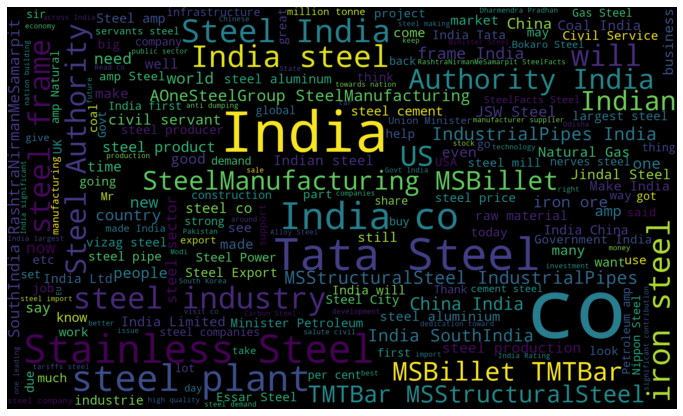

In [16]:
#Plot the Word Cloud
allwords = ' '.join([twts for twts in tweets_df1['Tweet']])
wordcloud = WordCloud(width =2000, height =1200, random_state =21, max_font_size =250).generate(allwords)

plt.figure(figsize=(12,20))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [17]:
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'

tweets_df1['Analysis']= tweets_df1['Polarity'].apply(getAnalysis)

In [18]:
tweets_df1

,Date Created,Tweet,Subjectivity,Polarity,Analysis
0,2022-06-29 21:30:47+00:00,New Energy Economics study led by MIT Joint Pr...,0.329293,0.195455,Positive
1,2022-06-29 19:08:41+00:00,.@TataSteelLtd is one of the largest steel man...,0.000000,0.000000,Neutral
2,2022-06-29 18:00:56+00:00,@cvkrishnan @Jay_premnath @ib4uanytime @NatMal...,0.680000,0.136667,Positive
3,2022-06-29 17:03:07+00:00,Hydrogen demand in India is expected to incre...,0.400000,-0.100000,Negative
4,2022-06-29 16:51:48+00:00,SAPPHIRE INDIA Kitchen Vegetable Slicer and Fo...,0.350000,0.350000,Positive
...,...,...,...,...,...
40296,2016-01-02 02:48:11+00:00,Growth means steel and cement. Unless this ide...,0.000000,0.000000,Neutral
40297,2016-01-01 18:01:15+00:00,@RailMinIndia bahut sare steel and old boggies...,0.450000,0.233333,Positive
40298,2016-01-01 08:05:16+00:00,RCEP: India offers no duty cuts on steel to Ch...,0.218182,0.145455,Positive
40299,2016-01-01 02:49:20+00:00,""" RCEP: India offers no duty cuts on steel to ...",0.227273,0.118182,Positive


In [19]:
tweets_df1['Analysis'].value_counts()

Positive    22149
Neutral     10992
Negative     7160
Name: Analysis, dtype: int64

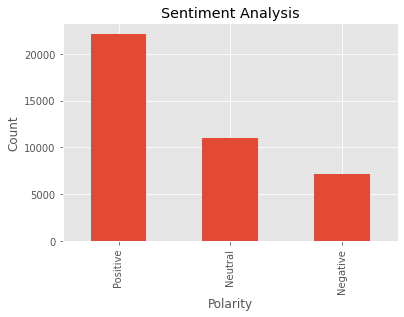

In [20]:
tweets_df1['Analysis'].value_counts().plot(kind='bar')
plt.title("Sentiment Analysis")
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.show()

In [21]:
# plotting scatter plot
'''
plt.figure(figsize=(8,6))
for i in range(0,tweets_df1.shape[0]):
    plt.scatter(tweets_df1['Polarity'][i],tweets_df1['Subjectivity'][i],color='Blue')
    
plt.title("Sentiment Analysis")
plt.xlim(-1,1)
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()
'''


'\nplt.figure(figsize=(8,6))\nfor i in range(0,tweets_df1.shape[0]):\n    plt.scatter(tweets_df1[\'Polarity\'][i],tweets_df1[\'Subjectivity\'][i],color=\'Blue\')\n    \nplt.title("Sentiment Analysis")\nplt.xlim(-1,1)\nplt.xlabel(\'Polarity\')\nplt.ylabel(\'Subjectivity\')\nplt.show()\n'

In [22]:
start = dt.datetime(2016,1,1)
end = dt.datetime(2022,6,30)

In [23]:
tweets_df1['Sentiment Parameter'] = tweets_df1['Subjectivity'] * tweets_df1['Polarity']

tweets_df1.head()

,Date Created,Tweet,Subjectivity,Polarity,Analysis,Sentiment Parameter
0,2022-06-29 21:30:47+00:00,New Energy Economics study led by MIT Joint Pr...,0.329293,0.195455,Positive,0.064362
1,2022-06-29 19:08:41+00:00,.@TataSteelLtd is one of the largest steel man...,0.000000,0.000000,Neutral,0.000000
2,2022-06-29 18:00:56+00:00,@cvkrishnan @Jay_premnath @ib4uanytime @NatMal...,0.680000,0.136667,Positive,0.092933
3,2022-06-29 17:03:07+00:00,Hydrogen demand in India is expected to incre...,0.400000,-0.100000,Negative,-0.040000
4,2022-06-29 16:51:48+00:00,SAPPHIRE INDIA Kitchen Vegetable Slicer and Fo...,0.350000,0.350000,Positive,0.122500


In [24]:
tweets_df1['Date Created'] = pd.to_datetime(tweets_df1['Date Created'])
tweets_df1.set_index('Date Created', inplace=True)
tweets_df2=tweets_df1.groupby(tweets_df1.index.date)['Sentiment Parameter'].mean()

"\n# tweets_df.index = tweets_df.index.astype('datetime64[ns]')\ntweets_df=tweets_df.fillna(0)\n\ntweets_df=tweets_df.groupby(pd.Grouper(freq='D')).mean()\n"

In [25]:
tweets_df2=pd.DataFrame(tweets_df2)
tweets_df2.index.name = 'Date'
tweets_df2

,Sentiment Parameter
Date,
2016-01-01,0.084356
2016-01-02,0.013430
2016-01-03,0.000000
2016-01-05,0.099713
2016-01-06,-0.014979
...,...
2022-06-25,0.092513
2022-06-26,0.023867
2022-06-27,0.047026


In [26]:
df = gh(symbol='SALSTEEL',start=start,end=end)
df.tail()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2022-06-24,SALSTEEL,EQ,7.90,7.90,8.25,7.90,8.25,8.25,8.21,67023,5.500284e+10,357,46495,0.6937
2022-06-27,SALSTEEL,EQ,8.25,8.40,8.50,8.25,8.35,8.35,8.36,77716,6.494078e+10,332,49106,0.6319
2022-06-28,SALSTEEL,EQ,8.35,8.50,8.50,8.25,8.50,8.40,8.39,27637,2.318282e+10,266,18189,0.6581
2022-06-29,SALSTEEL,EQ,8.40,8.65,8.65,8.25,8.25,8.30,8.37,49845,4.171797e+10,273,29293,0.5877
2022-06-30,SALSTEEL,EQ,8.30,8.55,8.65,8.20,8.60,8.55,8.48,105188,8.917568e+10,1102,55974,0.5321


In [27]:
#Variables for training
df1 = (df)[['Open','High','Low','Close','Prev Close','VWAP','Turnover','Last','Volume']]
print(df1)
df1.shape


            Open  High   Low  Close  Prev Close  VWAP      Turnover  Last  \
Date                                                                        
2016-01-01  3.40  3.50  3.25   3.40        3.25  3.38  2.401303e+10  3.40   
2016-01-04  3.40  3.40  3.15   3.20        3.40  3.27  7.330210e+09  3.20   
2016-01-05  3.50  3.50  3.10   3.15        3.20  3.20  3.339022e+10  3.25   
2016-01-06  3.30  3.30  3.15   3.15        3.15  3.21  1.008886e+10  3.15   
2016-01-07  3.00  3.15  3.00   3.10        3.15  3.06  1.048175e+10  3.15   
...          ...   ...   ...    ...         ...   ...           ...   ...   
2022-06-24  7.90  8.25  7.90   8.25        7.90  8.21  5.500284e+10  8.25   
2022-06-27  8.40  8.50  8.25   8.35        8.25  8.36  6.494078e+10  8.35   
2022-06-28  8.50  8.50  8.25   8.40        8.35  8.39  2.318282e+10  8.50   
2022-06-29  8.65  8.65  8.25   8.30        8.40  8.37  4.171797e+10  8.25   
2022-06-30  8.55  8.65  8.20   8.55        8.30  8.48  8.917568e+10  8.60   

(1220, 9)

In [28]:
df2 = pd.merge(tweets_df2, df1, how = 'outer', on = 'Date')

In [29]:
df2 = df2.dropna()
df2

,Sentiment Parameter,Open,High,Low,Close,Prev Close,VWAP,Turnover,Last,Volume
Date,,,,,,,,,,
2016-01-01,0.084356,3.40,3.50,3.25,3.40,3.25,3.38,2.401303e+10,3.40,70955
2016-01-05,0.099713,3.50,3.50,3.10,3.15,3.20,3.20,3.339022e+10,3.25,104311
2016-01-06,-0.014979,3.30,3.30,3.15,3.15,3.15,3.21,1.008886e+10,3.15,31453
2016-01-07,0.000000,3.00,3.15,3.00,3.10,3.15,3.06,1.048175e+10,3.15,34258
2016-01-08,0.035328,3.10,3.30,3.00,3.20,3.10,3.13,1.457473e+10,3.20,46585
...,...,...,...,...,...,...,...,...,...,...
2022-06-23,0.021288,8.00,8.40,7.75,7.90,8.00,8.12,1.237313e+11,8.00,152456
2022-06-24,0.061737,7.90,8.25,7.90,8.25,7.90,8.21,5.500284e+10,8.25,67023
2022-06-27,0.047026,8.40,8.50,8.25,8.35,8.25,8.36,6.494078e+10,8.35,77716


In [30]:
df2['Lift'] = df2['Close'] - df2['Open']
df2

,Sentiment Parameter,Open,High,Low,Close,Prev Close,VWAP,Turnover,Last,Volume,Lift
Date,,,,,,,,,,,
2016-01-01,0.084356,3.40,3.50,3.25,3.40,3.25,3.38,2.401303e+10,3.40,70955,0.00
2016-01-05,0.099713,3.50,3.50,3.10,3.15,3.20,3.20,3.339022e+10,3.25,104311,-0.35
2016-01-06,-0.014979,3.30,3.30,3.15,3.15,3.15,3.21,1.008886e+10,3.15,31453,-0.15
2016-01-07,0.000000,3.00,3.15,3.00,3.10,3.15,3.06,1.048175e+10,3.15,34258,0.10
2016-01-08,0.035328,3.10,3.30,3.00,3.20,3.10,3.13,1.457473e+10,3.20,46585,0.10
...,...,...,...,...,...,...,...,...,...,...,...
2022-06-23,0.021288,8.00,8.40,7.75,7.90,8.00,8.12,1.237313e+11,8.00,152456,-0.10
2022-06-24,0.061737,7.90,8.25,7.90,8.25,7.90,8.21,5.500284e+10,8.25,67023,0.35
2022-06-27,0.047026,8.40,8.50,8.25,8.35,8.25,8.36,6.494078e+10,8.35,77716,-0.05


In [32]:
print(df2.describe().Turnover)
df2.drop(df2[df2['Turnover'] == 0].index, inplace = True)


count    1.211000e+03
mean     7.085827e+10
std      2.141731e+11
min      1.397400e+08
25%      6.291682e+09
50%      1.620034e+10
75%      5.276107e+10
max      3.708883e+12
Name: Turnover, dtype: float64


In [33]:
# Setting up an early stop
earlystop = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=80,  verbose=1, mode='min')
callbacks_list = [earlystop]

In [34]:
#Build and train the model
def fit_model(train,val,timesteps,hl,lr,batch,epochs):
    X_train = []
    Y_train = []
    X_val = []
    Y_val = []
  
    # Loop for training data
    for i in range(timesteps,train.shape[0]):
        X_train.append(train[i-timesteps:i])
        Y_train.append(train[i][0])
    X_train,Y_train = np.array(X_train),np.array(Y_train)
  
    # Loop for val data
    for i in range(timesteps,val.shape[0]):
        X_val.append(val[i-timesteps:i])
        Y_val.append(val[i][0])
    X_val,Y_val = np.array(X_val),np.array(Y_val)
    
    # Adding Layers to the model
    model = Sequential()
    model.add(LSTM(X_train.shape[2],input_shape = (X_train.shape[1],X_train.shape[2]),return_sequences = True,
                   activation = 'relu'))
    for i in range(len(hl)-1):        
        model.add(LSTM(hl[i],activation = 'relu',return_sequences = True))
    model.add(LSTM(hl[-1],activation = 'relu'))
    model.add(Dense(1))
    model.compile(optimizer = tf.keras.optimizers.Adam(lr = lr), loss = 'mean_squared_error')
    #print(model.summary())
  
    # Training the data
    history = model.fit(X_train,Y_train,epochs = epochs,batch_size = batch,validation_data = (X_val, Y_val),verbose = 0,
                        shuffle = False, callbacks=callbacks_list)
    model.reset_states()
    return model, history.history['loss'], history.history['val_loss']

In [60]:
# Evaluating the model
def evaluate_model(model,test,timesteps):
    X_test = []
    Y_test = []

    # Loop for testing data
    for i in range(timesteps,test.shape[0]):
        X_test.append(test[i-timesteps:i])
        Y_test.append(test[i][0])
    X_test,Y_test = np.array(X_test),np.array(Y_test)
    #print(X_test.shape,Y_test.shape)
  
    # Prediction Time 
    Y_hat = model.predict(X_test)
    mse = mean_squared_error(Y_test,Y_hat)
    rmse = sqrt(mse)
    mae = mean_absolute_error(Y_test,Y_hat)
    r = r2_score(Y_test,Y_hat)
    return mse, rmse, mae, r, Y_test, Y_hat

In [36]:
# Plotting the predictions
def plot_data(Y_test,Y_hat):
    plt.plot(Y_test,c = 'r')
    plt.plot(Y_hat,c = 'y')
    plt.xlabel('Day')
    plt.ylabel('Stock Price')
    plt.title('Stock Prediction Graph using Multivariate-LSTM model')
    plt.legend(['Actual','Predicted'],loc = 'lower right')
    plt.show()

In [37]:
# Plotting the training errors
def plot_error(train_loss,val_loss):
    plt.plot(train_loss,c = 'r')
    plt.plot(val_loss,c = 'b')
    plt.ylabel('Loss')
    plt.legend(['train','val'],loc = 'upper right')
    plt.show()

In [38]:
# Extracting the series
series = df2[['Close','Turnover','Lift','Sentiment Parameter']]
print(series.shape)
print(series.tail())

(1211, 4)
            Close      Turnover  Lift  Sentiment Parameter
Date                                                      
2022-06-23   7.90  1.237313e+11 -0.10             0.021288
2022-06-24   8.25  5.500284e+10  0.35             0.061737
2022-06-27   8.35  6.494078e+10 -0.05             0.047026
2022-06-28   8.40  2.318282e+10 -0.10             0.055209
2022-06-29   8.30  4.171797e+10 -0.35             0.060102


In [39]:
# Train Val Test Split
train_start = dt.date(2016,1,1)
train_end = dt.date(2019,12,31)
train_data = series.loc[train_start:train_end]


val_start = dt.date(2020,1,1)
val_end = dt.date(2020,12,31)
val_data = series.loc[val_start:val_end]


test_start = dt.date(2021,1,1)
test_end = dt.date(2022,6,30)
test_data = series.loc[test_start:test_end]

print(train_data.shape,val_data.shape,test_data.shape)

(801, 4) (156, 4) (254, 4)


In [40]:
# Normalisation
sc = MinMaxScaler()
train = sc.fit_transform(train_data)
val = sc.transform(val_data)
test = sc.transform(test_data)
print(train.shape,val.shape,test.shape)

(801, 4) (156, 4) (254, 4)


In [71]:
timesteps = 30
hl = [40,35] #Neurons in each layer
lr = 1e-3 #Learning rate 0.001
batch_size = 30
num_epochs = 150

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


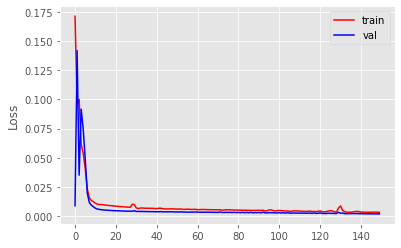

In [72]:
model,train_error,val_error = fit_model(train,val,timesteps,hl,lr,batch_size,num_epochs)
plot_error(train_error,val_error)

MSE = 0.021186429788673244
RMSE = 0.14555559002894133
MAE = 0.08384370135783079
R-Squared Score = 0.8761817857444105


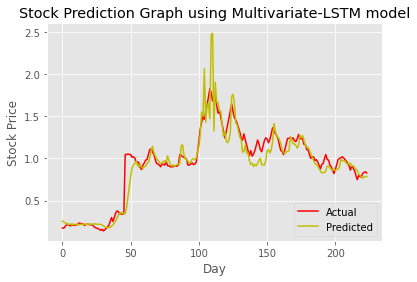

In [73]:
mse, rmse, mae, r2_value,true,predicted = evaluate_model(model,test,timesteps)
print('MSE = {}'.format(mse))
print('RMSE = {}'.format(rmse))
print('MAE = {}'.format(mae))
print('R-Squared Score = {}'.format(r2_value))
plot_data(true,predicted)
